首先先导入需要使用到的包

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

配置一些需要使用到的超参数

In [4]:
input_size = 1 # 输入的数据大小
output_size = 1 # 输出的大小
num_epochs = 60 # 训练的轮数
learning_rate = 0.001 # 训练的学习率

创建一些虚构的数据：

In [5]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

创建一个线性模型，直接使用`nn.Linear()`就可以了，线性模型还是使用MSE作为损失函数，并使用SGD优化器。

In [6]:
model=nn.Linear(input_size,output_size)
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

那么就可以训练了：

In [12]:
for epoch in range(num_epochs):
    # 将numpy 转化为Tensor
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 前向传播计算loss
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 反向传播并优化参数
    optimizer.zero_grad()
    loss.backward() # 反向传播
    optimizer.step() # 更新参数
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 0.2979
Epoch [10/60], Loss: 0.2976
Epoch [15/60], Loss: 0.2972
Epoch [20/60], Loss: 0.2969
Epoch [25/60], Loss: 0.2966
Epoch [30/60], Loss: 0.2963
Epoch [35/60], Loss: 0.2959
Epoch [40/60], Loss: 0.2956
Epoch [45/60], Loss: 0.2953
Epoch [50/60], Loss: 0.2950
Epoch [55/60], Loss: 0.2946
Epoch [60/60], Loss: 0.2943


将训练的模型的结构plot出来：

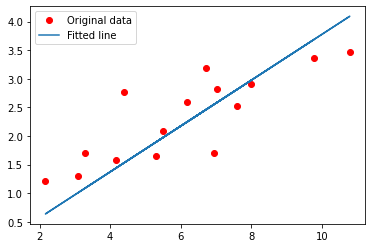

In [13]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

保存模型

In [15]:
torch.save(model.state_dict(), 'model.ckpt')